## import matplotlib.pyplot as plt
import pandas as pd
import math
import decimal
import seaborn as sns
from scipy import stats
import numpy as np
import logging
import string
from datetime import datetime

%matplotlib inline
sns.set_style('white')

In [2]:
path = './data/12_31_2019_stats.xlsx'
df = pd.read_excel(path) 
#df.rename(columns={'Unnamed: 0':'system'},inplace=True)  

#add cols
df['R/R'] = abs(df['max_return'] / df['min_return'])
df['meanratio'] = abs(df['mean_return'] / df['drawdown'])
df['mean_min_ratio'] = df['mean_return'] / df['median_return']

df.head()

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,drawdown,last_total_asset,sharpe_arith,std,std_annualized,R/R,meanratio,mean_min_ratio
0,2D_mm_1_s21_w21_12-31-2019_10-23-2020,-0.041099,-0.022307,0.041379,-0.225424,NaN,NaN,mm_1,-0.999728,-0.669884,0.355271,-1.006423,0.073531,0.993348,0.183560,0.061353,1.842488
1,2D_mm_2_s21_w21_12-31-2019_10-23-2020,-0.013561,-0.003929,0.092843,-0.168552,NaN,NaN,mm_2,-0.934266,-0.369956,0.709593,-1.395919,0.049543,0.669284,0.550826,0.036655,3.451704
2,2D_mm_3_s21_w21_12-31-2019_10-23-2020,-0.027773,-0.016438,0.052421,-0.118928,NaN,NaN,mm_3,-0.995181,-0.489506,0.510494,-1.618771,0.045508,0.614775,0.440777,0.056736,1.689580
3,2D_mm_4_s21_w21_12-31-2019_10-23-2020,-0.011818,-0.013317,0.084914,-0.157781,NaN,NaN,mm_4,-0.907920,-0.392163,0.740383,-1.385534,0.048506,0.655285,0.538178,0.030136,0.887455
4,2D_mm_5_s21_w21_12-31-2019_10-23-2020,-0.066515,-0.010020,0.053473,-0.923460,NaN,NaN,mm_5,-1.000000,-0.962719,0.039715,-0.378592,0.195523,2.641367,0.057905,0.069091,6.638277


In [56]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_return,392.0,-0.003971,0.008372,-0.066515,-0.006101,-0.002226,0.000232,0.022921
median_return,392.0,-0.002006,0.003628,-0.022307,-0.003621,-0.001313,0.000328,0.005082
max_return,392.0,0.164591,0.135646,0.033950,0.085007,0.126947,0.192156,0.770006
min_return,392.0,-0.188710,0.128973,-0.923460,-0.225127,-0.170842,-0.107327,-0.046579
maxdrawdown,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sharpe,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ann_returns,392.0,-0.231785,1.041799,-1.000000,-0.774222,-0.410706,-0.066648,10.395401
drawdown,392.0,-0.394233,0.159269,-0.962719,-0.500558,-0.376068,-0.266434,-0.118827
last_total_asset,392.0,0.794160,0.284245,0.039715,0.596624,0.770757,0.976706,1.879509
sharpe_arith,392.0,-0.467071,1.159849,-2.323376,-1.205776,-0.782824,-0.128531,6.048768


In [77]:
# Let's plot a histogram of all cols in DF
def plot_series(df, cols, title, xlab=None, ylab=None):
    
    # Set figure size 
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in list(df.columns):
        title = [col]
        # Generate a line plot of the column name.
        plt.hist(df[f'{col}'])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

In [79]:
#plot_series(df.drop(columns=['system','algo']), 'hist', cols);

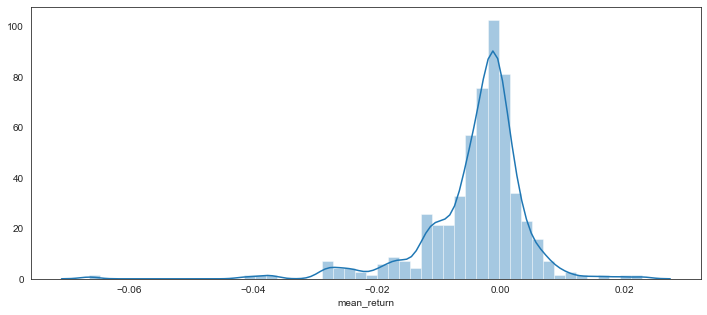

In [5]:
# Let's plot a histogram of MEAN RETURN
# Size
plt.figure(figsize = (12, 5))

sns.distplot(df['mean_return'], kde=True)


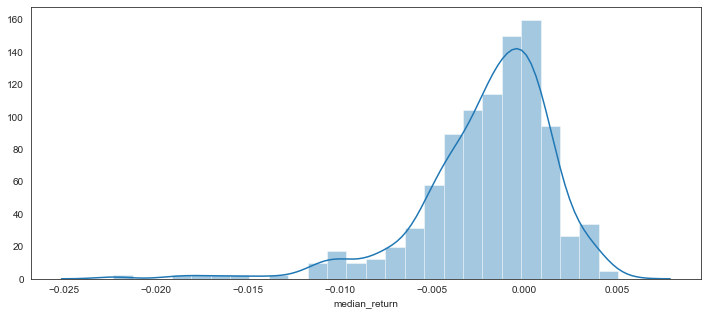

In [6]:
# Let's plot a histogram MEDIAN RETURN
# Size
plt.figure(figsize = (12, 5))

sns.distplot(df['median_return'], kde=True)

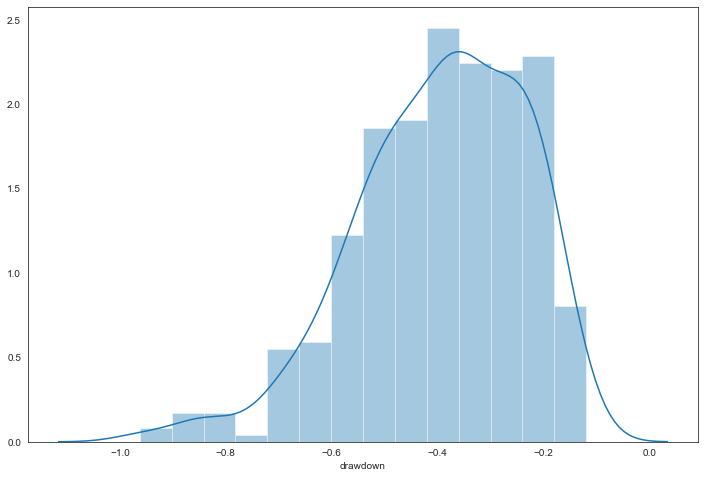

In [7]:
# Let's plot a histogram of DRAWDOWN
#  Size
plt.figure(figsize = (12, 8))

sns.distplot(df['drawdown'], kde=True)

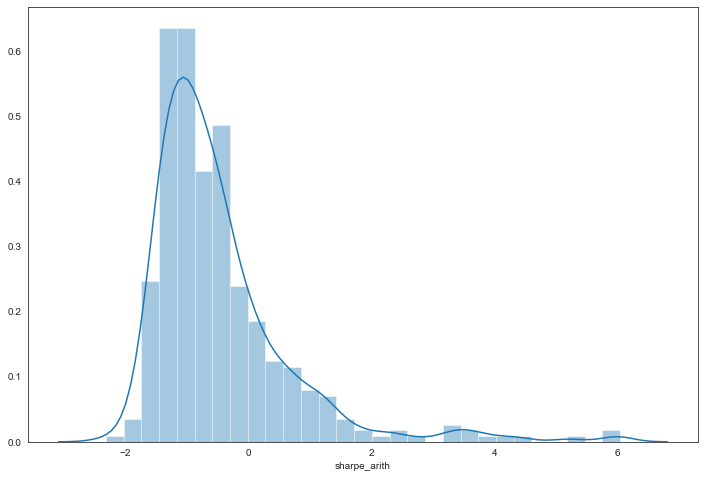

In [8]:
# Let's plot a histogram of SHARPE
#  Size
plt.figure(figsize = (12, 8))

sns.distplot(df['sharpe_arith'], kde=True)

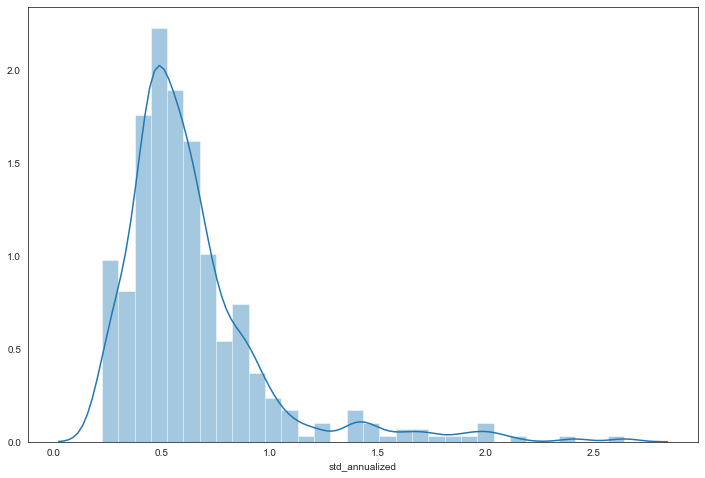

In [9]:
# Let's plot a histogram of STD
#  Size
plt.figure(figsize = (12, 8))

sns.distplot(df['std_annualized'], kde=True)

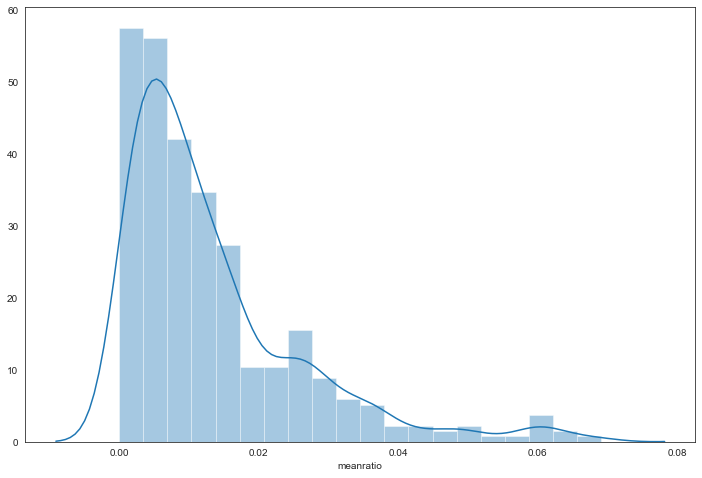

In [10]:
# Let's plot a histogram of mean/drawdown ratio
#  Size
plt.figure(figsize = (12, 8))

sns.distplot(df['meanratio'], kde=True)

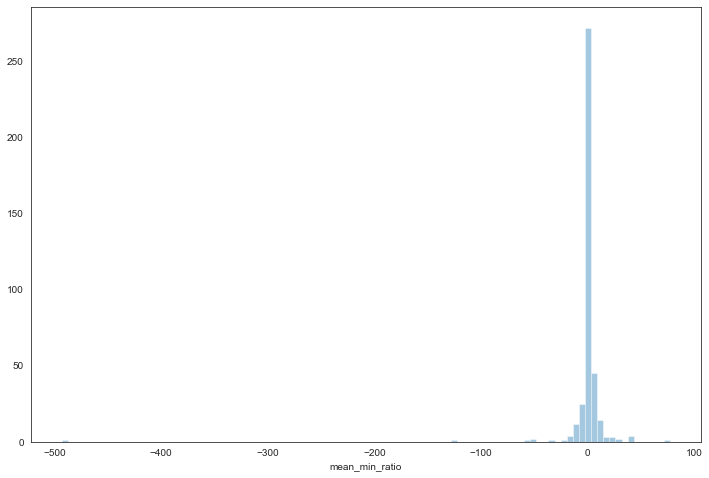

In [11]:
# Let's plot a histogram of mean/drawdown ratio
#  Size
plt.figure(figsize = (12, 8))

sns.distplot(df['mean_min_ratio'], bins=100,kde=False)

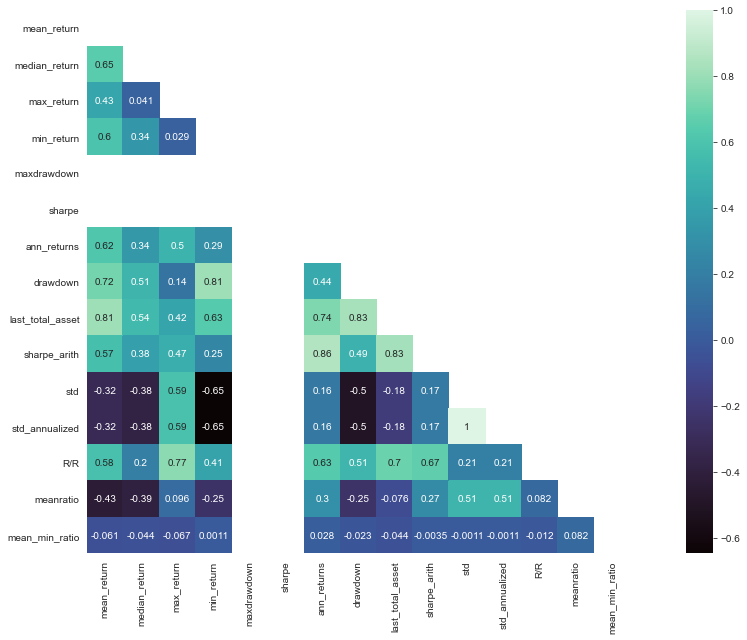

In [12]:
# Establish size of figure.
plt.figure(figsize = (20,10))

# Get correlation of variables.
corr = df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True);

<Figure size 720x576 with 0 Axes>

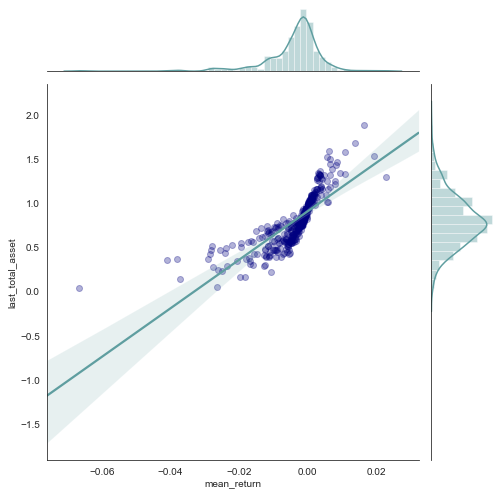

In [13]:
plt.figure(figsize = (10,8));
sns.jointplot(x="mean_return", y="last_total_asset", data=df,ci=99,
              scatter_kws = {'color': 'navy', 'alpha': 0.3},    
              kind="reg", truncate=False,
              color="cadetblue", height=7);

<Figure size 720x576 with 0 Axes>

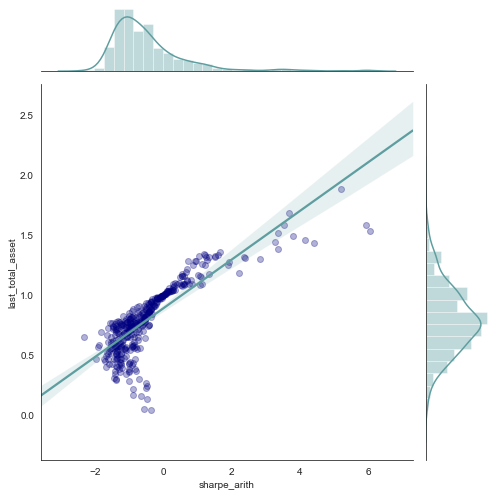

In [14]:
plt.figure(figsize = (10,8));
sns.jointplot(x="sharpe_arith", y="last_total_asset", data=df,ci=99,
              scatter_kws = {'color': 'navy', 'alpha': 0.3},    
              kind="reg", truncate=False,
              color="cadetblue", height=7);

<Figure size 576x576 with 0 Axes>

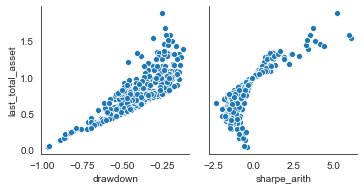

In [15]:
plt.figure(figsize = (8,8));

sns.pairplot(df, y_vars=['last_total_asset'], x_vars=['drawdown', 
                                                     'sharpe_arith']);

<Figure size 576x576 with 0 Axes>

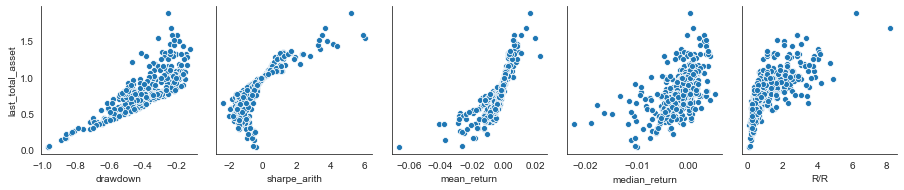

In [16]:
plt.figure(figsize = (8,8));

sns.pairplot(df, y_vars=['last_total_asset'], x_vars=['drawdown', 
                                                     'sharpe_arith',
                                                     'mean_return','median_return',
                                                      'R/R']);

In [17]:
df.sort_values(by=['last_total_asset','drawdown'],ascending=False).head(10)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,drawdown,last_total_asset,sharpe_arith,std,std_annualized,R/R,meanratio,mean_min_ratio
16,2D_mm_6_s21_w34_12-31-2019_10-23-2020,0.016384,0.000211,0.735674,-0.118589,NaN,NaN,mm_6,7.783010,-0.250372,1.879509,5.207239,0.110639,1.494652,6.203582,0.065440,77.605574
146,2D_mm_5_s55_w34_12-31-2019_10-23-2020,0.013817,0.000886,0.698236,-0.085205,NaN,NaN,mm_5,5.150205,-0.228025,1.677952,3.696828,0.103125,1.393142,8.194803,0.060594,15.595841
295,2D_mm_2_s144_w89_12-31-2019_10-23-2020,0.006366,-0.000421,0.221840,-0.078463,NaN,NaN,mm_2,1.819442,-0.197379,1.584158,3.542053,0.038023,0.513669,2.827310,0.032255,-15.119610
340,2D_mm_3_s149_w34_12-31-2019_10-23-2020,0.010798,0.003007,0.244032,-0.086564,NaN,NaN,mm_3,4.480464,-0.222415,1.578946,5.948765,0.055753,0.753175,2.819104,0.048548,3.591409
71,2D_mm_6_s34_w21_12-31-2019_10-23-2020,0.019478,0.001920,0.652859,-0.196902,NaN,NaN,mm_6,10.395401,-0.307320,1.532109,6.048768,0.127216,1.718598,3.315662,0.063380,10.143289
360,2D_mm_2_s149_w89_12-31-2019_10-23-2020,0.005793,0.003318,0.150461,-0.089315,NaN,NaN,mm_2,1.580618,-0.213066,1.515241,3.350398,0.034922,0.471770,1.684620,0.027189,1.745684
284,2D_mm_2_s144_w55_12-31-2019_10-23-2020,0.006554,0.002955,0.189747,-0.091624,NaN,NaN,mm_2,1.924012,-0.183029,1.491506,3.810435,0.037377,0.504932,2.070931,0.035808,2.217882
275,2D_mm_3_s144_w34_12-31-2019_10-23-2020,0.008600,0.003327,0.266024,-0.086564,NaN,NaN,mm_3,2.859586,-0.233588,1.458512,4.164871,0.050824,0.686596,3.073166,0.036819,2.585188
349,2D_mm_2_s149_w55_12-31-2019_10-23-2020,0.006445,0.002111,0.189747,-0.091624,NaN,NaN,mm_2,1.804249,-0.211071,1.435630,3.278892,0.040732,0.550262,2.070931,0.030533,3.053023
339,2D_mm_2_s149_w34_12-31-2019_10-23-2020,0.008383,0.003371,0.229932,-0.091624,NaN,NaN,mm_2,2.813168,-0.158565,1.432423,4.419216,0.047121,0.636576,2.509513,0.052870,2.486589


In [18]:
df.sort_values(by=['meanratio','drawdown'],ascending=False).head(10)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,drawdown,last_total_asset,sharpe_arith,std,std_annualized,R/R,meanratio,mean_min_ratio
4,2D_mm_5_s21_w21_12-31-2019_10-23-2020,-0.066515,-0.010020,0.053473,-0.923460,NaN,NaN,mm_5,-1.000000,-0.962719,0.039715,-0.378592,0.195523,2.641367,0.057905,0.069091,6.638277
16,2D_mm_6_s21_w34_12-31-2019_10-23-2020,0.016384,0.000211,0.735674,-0.118589,NaN,NaN,mm_6,7.783010,-0.250372,1.879509,5.207239,0.110639,1.494652,6.203582,0.065440,77.605574
71,2D_mm_6_s34_w21_12-31-2019_10-23-2020,0.019478,0.001920,0.652859,-0.196902,NaN,NaN,mm_6,10.395401,-0.307320,1.532109,6.048768,0.127216,1.718598,3.315662,0.063380,10.143289
0,2D_mm_1_s21_w21_12-31-2019_10-23-2020,-0.041099,-0.022307,0.041379,-0.225424,NaN,NaN,mm_1,-0.999728,-0.669884,0.355271,-1.006423,0.073531,0.993348,0.183560,0.061353,1.842488
146,2D_mm_5_s55_w34_12-31-2019_10-23-2020,0.013817,0.000886,0.698236,-0.085205,NaN,NaN,mm_5,5.150205,-0.228025,1.677952,3.696828,0.103125,1.393142,8.194803,0.060594,15.595841
5,2D_mm_6_s21_w21_12-31-2019_10-23-2020,0.022921,-0.004776,0.755214,-0.198375,NaN,NaN,mm_6,6.792976,-0.379274,1.295326,2.818825,0.178386,2.409861,3.807006,0.060433,-4.799125
8,2D_mm_9_s21_w21_12-31-2019_10-23-2020,-0.038006,-0.011711,0.044652,-0.402758,NaN,NaN,mm_9,-0.999681,-0.640724,0.362501,-0.817508,0.090519,1.222839,0.110865,0.059318,3.245312
21,2D_mm_11_s21_w34_12-31-2019_10-23-2020,0.007011,-0.001442,0.269573,-0.067049,NaN,NaN,mm_11,2.048771,-0.118827,1.382277,3.370083,0.045001,0.607929,4.020514,0.059001,-4.860758
2,2D_mm_3_s21_w21_12-31-2019_10-23-2020,-0.027773,-0.016438,0.052421,-0.118928,NaN,NaN,mm_3,-0.995181,-0.489506,0.510494,-1.618771,0.045508,0.614775,0.440777,0.056736,1.689580
339,2D_mm_2_s149_w34_12-31-2019_10-23-2020,0.008383,0.003371,0.229932,-0.091624,NaN,NaN,mm_2,2.813168,-0.158565,1.432423,4.419216,0.047121,0.636576,2.509513,0.052870,2.486589


In [19]:
df.sort_values(by=['mean_min_ratio','drawdown'],ascending=False).head(10)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,drawdown,last_total_asset,sharpe_arith,std,std_annualized,R/R,meanratio,mean_min_ratio
16,2D_mm_6_s21_w34_12-31-2019_10-23-2020,0.016384,0.000211,0.735674,-0.118589,NaN,NaN,mm_6,7.783010,-0.250372,1.879509,5.207239,0.110639,1.494652,6.203582,0.065440,77.605574
148,2D_mm_7_s55_w34_12-31-2019_10-23-2020,-0.003491,-0.000083,0.151398,-0.104892,NaN,NaN,mm_7,-0.548580,-0.270455,0.797222,-0.971565,0.041796,0.564635,1.443366,0.012908,42.247315
296,2D_mm_3_s144_w89_12-31-2019_10-23-2020,-0.003069,-0.000080,0.139835,-0.431591,NaN,NaN,mm_3,-0.627730,-0.610684,0.644958,-0.758518,0.061260,0.827574,0.323998,0.005026,38.263225
129,2D_mm_10_s34_w149_12-31-2019_10-23-2020,-0.002570,-0.000067,0.051070,-0.086391,NaN,NaN,mm_10,-0.392844,-0.313395,0.720298,-1.629189,0.017849,0.241129,0.591154,0.008202,38.125156
203,2D_mm_8_s89_w21_12-31-2019_10-23-2020,-0.008744,-0.000232,0.211020,-0.175925,NaN,NaN,mm_8,-0.858310,-0.418607,0.702334,-1.016126,0.062527,0.844688,1.199490,0.020889,37.729839
234,2D_mm_6_s89_w89_12-31-2019_10-23-2020,-0.004871,-0.000173,0.056908,-0.203299,NaN,NaN,mm_6,-0.633718,-0.409767,0.622953,-1.392259,0.033693,0.455173,0.279922,0.011887,28.236275
247,2D_mm_8_s89_w144_12-31-2019_10-23-2020,-0.002923,-0.000107,0.161983,-0.214063,NaN,NaN,mm_8,-0.481822,-0.514785,0.697510,-0.988331,0.036087,0.487511,0.756711,0.005679,27.203258
49,2D_mm_6_s21_w144_12-31-2019_10-23-2020,-0.002652,-0.000112,0.086728,-0.105465,NaN,NaN,mm_6,-0.425014,-0.375989,0.682440,-1.152259,0.027304,0.368853,0.822345,0.007052,23.741779
357,2D_mm_10_s149_w55_12-31-2019_10-23-2020,0.004815,0.000204,0.220187,-0.053153,NaN,NaN,mm_10,1.161385,-0.170802,1.310345,2.394707,0.035900,0.484980,4.142484,0.028189,23.560377
281,2D_mm_10_s144_w34_12-31-2019_10-23-2020,0.004072,0.000184,0.321890,-0.091673,NaN,NaN,mm_10,0.707724,-0.172359,1.161314,1.016948,0.051515,0.695929,3.511282,0.023628,22.140546


<Figure size 720x576 with 0 Axes>

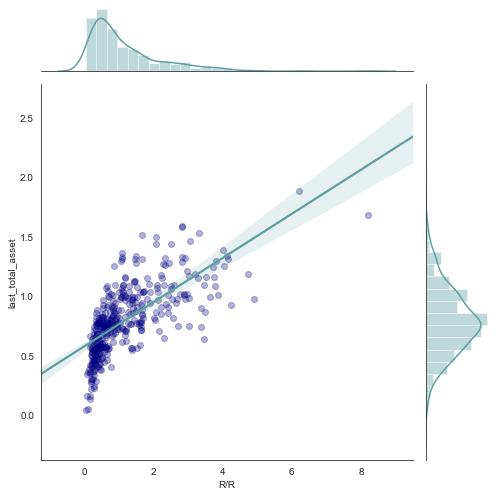

In [20]:
plt.figure(figsize = (10,8));
sns.jointplot(x="R/R", y="last_total_asset", data=df,ci=99,
              scatter_kws = {'color': 'navy', 'alpha': 0.3},    
              kind="reg", truncate=False,
              color="cadetblue", height=7);

In [21]:
# # Plotting
#                         figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

#                         assets = [x.asset for x in p_l_history]
#                         dates = [x.date for x in p_l_history]

#                         daily = pd.DataFrame(assets, index=dates).resample('1D').last()
#                         daily_returns = (daily / daily.shift(1)) - 1
#                         sharpe = (daily_returns.mean() / daily_returns.std()) * math.sqrt(365)

#                         # dates = list(map(lambda x: x.date, p_l_history))

#                         # plotting the points
#                         plt.plot(dates, assets)

#                         # naming the x axis
#                         plt.xlabel('date')
#                         # naming the y axis
#                         plt.ylabel('total asset')

#                         plt.plot(dates, assets ="Total Asset: {}".format(sharpe.iloc[0]))

#                         # giving a title to my graph
#                         plt.title(name)
#                         plt.legend()
#                         # function to show the plot
#                         plt.show(block=True)            

#                         # Size
#                         plt.figure(figsize = (12, 5))

#                         plt.plot(dates,bowls_eaten,color = 'pink')

#                         # Create a descriptive title
#                         plt.title('Number of Cereal Bowls Noelle ate each day over time')
#                         # Add axis labels
#                         plt.ylabel('Cereal Bowls');

In [22]:
df2 = df[df['last_total_asset'] >=1]

In [23]:
df2.sort_values(by=['last_total_asset','drawdown'],ascending=False)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,drawdown,last_total_asset,sharpe_arith,std,std_annualized,R/R,meanratio,mean_min_ratio
16,2D_mm_6_s21_w34_12-31-2019_10-23-2020,0.016384,0.000211,0.735674,-0.118589,NaN,NaN,mm_6,7.783010,-0.250372,1.879509,5.207239,0.110639,1.494652,6.203582,0.065440,77.605574
146,2D_mm_5_s55_w34_12-31-2019_10-23-2020,0.013817,0.000886,0.698236,-0.085205,NaN,NaN,mm_5,5.150205,-0.228025,1.677952,3.696828,0.103125,1.393142,8.194803,0.060594,15.595841
295,2D_mm_2_s144_w89_12-31-2019_10-23-2020,0.006366,-0.000421,0.221840,-0.078463,NaN,NaN,mm_2,1.819442,-0.197379,1.584158,3.542053,0.038023,0.513669,2.827310,0.032255,-15.119610
340,2D_mm_3_s149_w34_12-31-2019_10-23-2020,0.010798,0.003007,0.244032,-0.086564,NaN,NaN,mm_3,4.480464,-0.222415,1.578946,5.948765,0.055753,0.753175,2.819104,0.048548,3.591409
71,2D_mm_6_s34_w21_12-31-2019_10-23-2020,0.019478,0.001920,0.652859,-0.196902,NaN,NaN,mm_6,10.395401,-0.307320,1.532109,6.048768,0.127216,1.718598,3.315662,0.063380,10.143289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2D_mm_6_s89_w21_12-31-2019_10-23-2020,0.005960,-0.004740,0.670017,-0.173130,NaN,NaN,mm_6,0.043102,-0.361772,1.007660,0.025375,0.125737,1.698617,3.870029,0.016475,-1.257458
208,2D_mm_2_s89_w34_12-31-2019_10-23-2020,0.000942,-0.001113,0.135152,-0.161326,NaN,NaN,mm_2,0.025683,-0.191516,1.007532,0.047512,0.040014,0.540563,0.837757,0.004921,-0.846702
136,2D_mm_6_s55_w21_12-31-2019_10-23-2020,0.005728,-0.007369,0.582031,-0.201370,NaN,NaN,mm_6,0.049508,-0.354056,1.007441,0.030473,0.120263,1.624668,2.890351,0.016178,-0.777313
325,2D_mm_10_s144_w149_12-31-2019_10-23-2020,0.000190,-0.000350,0.058327,-0.052397,NaN,NaN,mm_10,0.009852,-0.184908,1.005549,0.043831,0.016639,0.224781,1.113182,0.001030,-0.543579


In [24]:
(len(df2) / len(df)) 

0.21683673469387754

In [25]:
df['last_total_asset'].value_counts(normalize=True, bins = 20)

(0.684, 0.776]     0.178571
(0.776, 0.868]     0.132653
(0.96, 1.052]      0.112245
(0.5, 0.592]       0.107143
(0.592, 0.684]     0.094388
(0.868, 0.96]      0.073980
(0.408, 0.5]       0.068878
(1.052, 1.144]     0.051020
(1.236, 1.328]     0.045918
(0.316, 0.408]     0.033163
(1.144, 1.236]     0.030612
(0.224, 0.316]     0.020408
(0.132, 0.224]     0.010204
(1.512, 1.604]     0.010204
(1.42, 1.512]      0.010204
(1.328, 1.42]      0.010204
(0.0369, 0.132]    0.005102
(1.604, 1.696]     0.002551
(1.788, 1.88]      0.002551
(1.696, 1.788]     0.000000
Name: last_total_asset, dtype: float64

In [26]:
df3 = df2[df2['R/R'] >=1.45]

In [27]:
df3.sort_values(by=['last_total_asset','drawdown'],ascending=False)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,drawdown,last_total_asset,sharpe_arith,std,std_annualized,R/R,meanratio,mean_min_ratio
16,2D_mm_6_s21_w34_12-31-2019_10-23-2020,0.016384,0.000211,0.735674,-0.118589,NaN,NaN,mm_6,7.783010,-0.250372,1.879509,5.207239,0.110639,1.494652,6.203582,0.065440,77.605574
146,2D_mm_5_s55_w34_12-31-2019_10-23-2020,0.013817,0.000886,0.698236,-0.085205,NaN,NaN,mm_5,5.150205,-0.228025,1.677952,3.696828,0.103125,1.393142,8.194803,0.060594,15.595841
295,2D_mm_2_s144_w89_12-31-2019_10-23-2020,0.006366,-0.000421,0.221840,-0.078463,NaN,NaN,mm_2,1.819442,-0.197379,1.584158,3.542053,0.038023,0.513669,2.827310,0.032255,-15.119610
340,2D_mm_3_s149_w34_12-31-2019_10-23-2020,0.010798,0.003007,0.244032,-0.086564,NaN,NaN,mm_3,4.480464,-0.222415,1.578946,5.948765,0.055753,0.753175,2.819104,0.048548,3.591409
71,2D_mm_6_s34_w21_12-31-2019_10-23-2020,0.019478,0.001920,0.652859,-0.196902,NaN,NaN,mm_6,10.395401,-0.307320,1.532109,6.048768,0.127216,1.718598,3.315662,0.063380,10.143289
360,2D_mm_2_s149_w89_12-31-2019_10-23-2020,0.005793,0.003318,0.150461,-0.089315,NaN,NaN,mm_2,1.580618,-0.213066,1.515241,3.350398,0.034922,0.471770,1.684620,0.027189,1.745684
284,2D_mm_2_s144_w55_12-31-2019_10-23-2020,0.006554,0.002955,0.189747,-0.091624,NaN,NaN,mm_2,1.924012,-0.183029,1.491506,3.810435,0.037377,0.504932,2.070931,0.035808,2.217882
275,2D_mm_3_s144_w34_12-31-2019_10-23-2020,0.008600,0.003327,0.266024,-0.086564,NaN,NaN,mm_3,2.859586,-0.233588,1.458512,4.164871,0.050824,0.686596,3.073166,0.036819,2.585188
349,2D_mm_2_s149_w55_12-31-2019_10-23-2020,0.006445,0.002111,0.189747,-0.091624,NaN,NaN,mm_2,1.804249,-0.211071,1.435630,3.278892,0.040732,0.550262,2.070931,0.030533,3.053023
339,2D_mm_2_s149_w34_12-31-2019_10-23-2020,0.008383,0.003371,0.229932,-0.091624,NaN,NaN,mm_2,2.813168,-0.158565,1.432423,4.419216,0.047121,0.636576,2.509513,0.052870,2.486589


In [28]:
pd.get_dummies(df3,columns=['algo'],drop_first=False)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,ann_returns,drawdown,last_total_asset,...,algo_mm_10,algo_mm_11,algo_mm_2,algo_mm_3,algo_mm_4,algo_mm_5,algo_mm_6,algo_mm_7,algo_mm_8,algo_mm_9
5,2D_mm_6_s21_w21_12-31-2019_10-23-2020,0.022921,-0.004776,0.755214,-0.198375,NaN,NaN,6.792976,-0.379274,1.295326,...,0,0,0,0,0,0,1,0,0,0
10,2D_mm_11_s21_w21_12-31-2019_10-23-2020,0.005433,0.002044,0.255307,-0.097926,NaN,NaN,0.956391,-0.220620,1.088257,...,0,1,0,0,0,0,0,0,0,0
12,2D_mm_2_s21_w34_12-31-2019_10-23-2020,0.001243,-0.001035,0.116029,-0.067803,NaN,NaN,0.131656,-0.246474,1.036571,...,0,0,1,0,0,0,0,0,0,0
16,2D_mm_6_s21_w34_12-31-2019_10-23-2020,0.016384,0.000211,0.735674,-0.118589,NaN,NaN,7.783010,-0.250372,1.879509,...,0,0,0,0,0,0,1,0,0,0
20,2D_mm_10_s21_w34_12-31-2019_10-23-2020,0.003638,0.001667,0.234512,-0.077438,NaN,NaN,0.712323,-0.136801,1.169057,...,1,0,0,0,0,0,0,0,0,0
21,2D_mm_11_s21_w34_12-31-2019_10-23-2020,0.007011,-0.001442,0.269573,-0.067049,NaN,NaN,2.048771,-0.118827,1.382277,...,0,1,0,0,0,0,0,0,0,0
36,2D_mm_4_s21_w89_12-31-2019_10-23-2020,0.003618,-0.001949,0.127630,-0.086930,NaN,NaN,0.697796,-0.207777,1.313430,...,0,0,0,0,1,0,0,0,0,0
40,2D_mm_8_s21_w89_12-31-2019_10-23-2020,0.003688,0.000904,0.291453,-0.100018,NaN,NaN,0.701339,-0.264855,1.314841,...,0,0,0,0,0,0,0,0,1,0
41,2D_mm_9_s21_w89_12-31-2019_10-23-2020,0.001185,-0.001270,0.109916,-0.047424,NaN,NaN,0.187487,-0.188697,1.092544,...,0,0,0,0,0,0,0,0,0,1
71,2D_mm_6_s34_w21_12-31-2019_10-23-2020,0.019478,0.001920,0.652859,-0.196902,NaN,NaN,10.395401,-0.307320,1.532109,...,0,0,0,0,0,0,1,0,0,0


In [29]:
path = './data/04_25_2019_stats.xlsx'
df_ = pd.read_excel(path) 
df_.rename(columns={'Unnamed: 0':'system'},inplace=True)  

In [30]:
df_.head()

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,last_total_asset,std,std_annualized
0,2D_mm_1_s21_w21_04-25-2019_10-23-2020,0.010438,0.000875,0.182459,-0.073421,-0.146240,7.046856,mm_1,4.505378,1.703606,0.047327,0.639346
1,2D_mm_2_s21_w21_04-25-2019_10-23-2020,0.002336,-0.000733,0.135541,-0.165306,-0.411362,0.368530,mm_2,0.241204,1.069818,0.048449,0.654504
2,2D_mm_3_s21_w21_04-25-2019_10-23-2020,-0.002349,-0.003213,0.155473,-0.102692,-0.391124,-0.763481,mm_3,-0.449523,0.829899,0.043584,0.588781
3,2D_mm_4_s21_w21_04-25-2019_10-23-2020,-0.003476,-0.001626,0.184738,-0.246122,-0.541657,-0.769386,mm_4,-0.620185,0.739075,0.059669,0.806077
4,2D_mm_5_s21_w21_04-25-2019_10-23-2020,0.009012,0.004480,0.195586,-0.122765,-0.416375,3.702275,mm_5,2.876813,1.526854,0.057519,0.777039


In [31]:
df_.sort_values(by=['maxdrawdown','last_total_asset',],ascending=False)

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,last_total_asset,std,std_annualized
403,2D_mm_16_s144_w34_04-25-2019_10-23-2020,0.001944,0.000008,0.086530,-0.054028,-0.071115,1.503716,mm_16,0.381464,1.202193,0.018778,0.253681
378,2D_mm_7_s144_w21_04-25-2019_10-23-2020,0.009060,0.001383,0.165619,-0.057152,-0.082564,7.412490,mm_7,3.643586,1.699032,0.036386,0.491547
382,2D_mm_11_s144_w21_04-25-2019_10-23-2020,0.009060,0.001383,0.165619,-0.057152,-0.082564,7.412490,mm_11,3.643586,1.699032,0.036386,0.491547
474,2D_mm_7_s149_w21_04-25-2019_10-23-2020,0.009184,0.001383,0.165619,-0.057152,-0.084170,7.631676,mm_7,3.747936,1.626642,0.036353,0.491103
478,2D_mm_11_s149_w21_04-25-2019_10-23-2020,0.009184,0.001383,0.165619,-0.057152,-0.084170,7.631676,mm_11,3.747936,1.626642,0.036353,0.491103
...,...,...,...,...,...,...,...,...,...,...,...,...
560,2D_mm_13_s149_w149_04-25-2019_10-23-2020,-0.004812,-0.001459,0.069308,-0.275572,-0.774685,-1.396264,mm_13,-0.629248,0.310702,0.033360,0.450665
239,2D_mm_4_s55_w89_04-25-2019_10-23-2020,-0.005812,-0.000358,0.091942,-0.539575,-0.795589,-1.149918,mm_4,-0.743090,0.235825,0.047835,0.646211
329,2D_mm_4_s89_w89_04-25-2019_10-23-2020,-0.006453,-0.001131,0.087280,-0.539575,-0.799525,-1.110227,mm_4,-0.783480,0.240443,0.052238,0.705693
315,2D_mm_4_s89_w55_04-25-2019_10-23-2020,-0.006799,-0.001885,0.108261,-0.539575,-0.807829,-1.008595,mm_4,-0.817575,0.289402,0.060004,0.810609


In [32]:
df_1 = df_[df_['last_total_asset'] >=.9]

In [33]:
df_1

,system,mean_return,median_return,max_return,min_return,maxdrawdown,sharpe,algo,ann_returns,last_total_asset,std,std_annualized
0,2D_mm_1_s21_w21_04-25-2019_10-23-2020,0.010438,0.000875,0.182459,-0.073421,-0.146240,7.046856,mm_1,4.505378,1.703606,0.047327,0.639346
1,2D_mm_2_s21_w21_04-25-2019_10-23-2020,0.002336,-0.000733,0.135541,-0.165306,-0.411362,0.368530,mm_2,0.241204,1.069818,0.048449,0.654504
4,2D_mm_5_s21_w21_04-25-2019_10-23-2020,0.009012,0.004480,0.195586,-0.122765,-0.416375,3.702275,mm_5,2.876813,1.526854,0.057519,0.777039
7,2D_mm_8_s21_w21_04-25-2019_10-23-2020,0.001950,0.006294,0.088496,-0.168165,-0.284217,0.469362,mm_8,0.243731,1.070498,0.038439,0.519281
8,2D_mm_9_s21_w21_04-25-2019_10-23-2020,0.005854,0.003496,0.188555,-0.058225,-0.215332,2.816897,mm_9,1.529871,1.336285,0.040202,0.543105
...,...,...,...,...,...,...,...,...,...,...,...,...
557,2D_mm_10_s149_w149_04-25-2019_10-23-2020,-0.000048,-0.000093,0.058244,-0.063297,-0.206206,-0.160753,mm_10,-0.042562,0.950050,0.019599,0.264768
558,2D_mm_11_s149_w149_04-25-2019_10-23-2020,-0.000262,-0.000277,0.059348,-0.059668,-0.313945,-0.297181,mm_11,-0.083091,0.902853,0.020697,0.279599
559,2D_mm_12_s149_w149_04-25-2019_10-23-2020,0.001746,0.000030,0.276693,-0.090221,-0.318856,0.576121,mm_12,0.254825,1.306589,0.032741,0.442311
562,2D_mm_15_s149_w149_04-25-2019_10-23-2020,0.001292,0.000963,0.086907,-0.049010,-0.141464,1.100612,mm_15,0.237082,1.284852,0.015945,0.215409


In [34]:
df_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean_return,236.0,0.001438,0.002145,-0.000650,0.000134,0.000840,0.001751,0.010922
median_return,236.0,0.000210,0.001589,-0.005732,-0.000593,0.000062,0.000896,0.008496
max_return,236.0,0.169973,0.139243,0.037140,0.088376,0.127483,0.186281,0.801444
min_return,236.0,-0.099981,0.049605,-0.304047,-0.123118,-0.086685,-0.061837,-0.030060
maxdrawdown,236.0,-0.241451,0.084414,-0.467102,-0.289037,-0.225695,-0.187175,-0.071115
sharpe,236.0,0.579349,1.378024,-0.511862,-0.115387,0.256503,0.714418,8.843768
ann_returns,236.0,0.277279,0.741055,-0.264001,-0.036882,0.085448,0.244976,5.189435
last_total_asset,236.0,1.114492,0.192395,0.901116,0.967985,1.071724,1.186026,1.906121
std,236.0,0.030477,0.016355,0.013182,0.019692,0.026531,0.033592,0.116351
std_annualized,236.0,0.411726,0.220949,0.178078,0.266024,0.358413,0.453809,1.571820


In [35]:
df_1['last_total_asset'].value_counts(normalize=True,bins=20)

(0.899, 0.951]    0.194915
(0.951, 1.002]    0.165254
(1.102, 1.152]    0.148305
(1.052, 1.102]    0.105932
(1.002, 1.052]    0.088983
(1.152, 1.203]    0.072034
(1.253, 1.303]    0.050847
(1.303, 1.353]    0.038136
(1.504, 1.554]    0.038136
(1.203, 1.253]    0.033898
(1.353, 1.404]    0.016949
(1.655, 1.705]    0.012712
(1.605, 1.655]    0.008475
(1.404, 1.454]    0.004237
(1.454, 1.504]    0.004237
(1.554, 1.605]    0.004237
(1.705, 1.755]    0.004237
(1.755, 1.806]    0.004237
(1.856, 1.906]    0.004237
(1.806, 1.856]    0.000000
Name: last_total_asset, dtype: float64

In [36]:
from collections import Counter

In [37]:
percentiles = [.98,.77,.76,.27,.33,.55]

percentiles2 = [.99,.79,.78,.23,.2,.55]


In [38]:
# Using collections.Counter() 
# Difference of list including duplicates 
res = list((Counter(percentiles) - Counter(percentiles2)).elements()) 
res

[0.98, 0.77, 0.76, 0.27, 0.33]

In [39]:
percentilessum = sum(res)
percentilessum

3.11

In [40]:
if setpercentiles
        
        if len(percentiles.unique()) != len(percentiles):
            percentiles[:] = 0
            return percentiles

SyntaxError: invalid syntax (<ipython-input-40-4b76607d7671>, line 1)

In [80]:
INPUT_PICKLE_FILE = '../scripts/pickles/2D_89_89_preprocessed_data.pickle'

In [81]:
import pickle


In [82]:
dfpickle = pd.read_pickle(INPUT_PICKLE_FILE)

In [83]:
dfpickle

{'resampled_history_data': Time                                                      ETH  \
 2016-01-01                                           0.002147   
 2016-01-03                                           0.002209   
 2016-01-05                                           0.002219   
 2016-01-07                                           0.002177   
 2016-01-09                                           0.002228   
 ...                                                       ...   
 2020-11-27  0.03032999999999999932165373195402935380116105...   
 2020-11-29  0.03130999999999999755528889977540529798716306...   
 2020-12-01  0.03108999999999999958033569669169082771986722...   
 2020-12-03  0.03041999999999999912403403357075148960575461...   
 2020-12-05  0.03114000000000000101252339845814276486635208...   
 
 Time                                                      XRP  \
 2016-01-01                                         0.00001407   
 2016-01-03                                     